# Wage Gap Prediction

## Data preparation and cleaning

## 1 Import Python Libraries

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import sklearn
import matplotlib.pyplot as plt
import sklearn.preprocessing as sp
import statsmodels.api as sm
from  sklearn import feature_selection 
from sklearn import linear_model
from sklearn import metrics
from pandas.stats.api import ols

## 2 Load CSVs

In [12]:
gender_data_raw = pd.read_csv('working_data\GenderStat_Data_new.csv',header=None,skiprows=0)

payment_gap_oecd_raw = pd.read_csv('working_data\Payment_gap_oecd.csv', header=None,skiprows = 1)
payment_gap_oecd_raw.head(10)

,0,1,2,3,4,5,6,7
0,AUS,WAGEGAP,TOT,PC_MENWAGE,A,1975,21.582733,Australia
1,AUS,WAGEGAP,TOT,PC_MENWAGE,A,1976,20.754717,Australia
2,AUS,WAGEGAP,TOT,PC_MENWAGE,A,1977,18.390804,Australia
3,AUS,WAGEGAP,TOT,PC_MENWAGE,A,1978,19.791666,Australia
4,AUS,WAGEGAP,TOT,PC_MENWAGE,A,1979,20.000000,Australia
5,AUS,WAGEGAP,TOT,PC_MENWAGE,A,1980,18.750000,Australia
6,AUS,WAGEGAP,TOT,PC_MENWAGE,A,1981,18.253969,Australia
7,AUS,WAGEGAP,TOT,PC_MENWAGE,A,1982,20.819113,Australia
8,AUS,WAGEGAP,TOT,PC_MENWAGE,A,1983,19.155844,Australia
9,AUS,WAGEGAP,TOT,PC_MENWAGE,A,1984,18.674698,Australia


## 3 Travers years and indicator in GenderStats

In [13]:
#remove the columns - 'Country Code', 'Indicator Code'
gender_data_raw.drop(gender_data_raw.columns[[1,3]], axis=1, inplace=True)
#rename 'Country Name' column to 'country-full-name', in order to be adjusted to payment_gap_oecd_raw
gender_data_raw.loc[0,0] = 'country-full-name'

#tranvers columns by pivot table
gender_data_raw.columns = gender_data_raw.loc[0]
gender_data_raw = pd.pivot_table(gender_data_raw,index ='country-full-name', columns='Indicator Name')

gender_data_raw = gender_data_raw.stack(level=0)
gender_data_raw.reset_index(inplace=True)
gender_data_raw.rename(columns={0:'Year'},inplace=True)
gender_data_raw.rename(columns={"Indicator Name":'Id'},inplace=True)
gender_data_raw.to_csv("TempCsv.csv")

#reading for creating new normelized data frame
gender_stats_normalized = pd.read_csv("TempCsv.csv")
gender_stats_normalized.drop(gender_stats_normalized.columns[[0]], axis=1, inplace=True)
gender_stats_normalized.head()

,country-full-name,Year,"Access to anti-retroviral drugs, female (%)","Access to anti-retroviral drugs, male (%)","Account at a financial institution, female (% age 15+) [ts]","Account at a financial institution, male (% age 15+) [ts]","Adolescent fertility rate (births per 1,000 women ages 15-19)","Age at first marriage, female","Age at first marriage, male",Age dependency ratio (% of working-age population),...,Women who own land both alone and jointly (% of women age 15-49): Q3,Women who own land both alone and jointly (% of women age 15-49): Q4,Women who own land both alone and jointly (% of women age 15-49): Q5 (highest),Women who own land jointly (% of women age 15-49),Women who own land jointly (% of women age 15-49): Q1 (lowest),Women who own land jointly (% of women age 15-49): Q2,Women who own land jointly (% of women age 15-49): Q3,Women who own land jointly (% of women age 15-49): Q4,Women who own land jointly (% of women age 15-49): Q5 (highest),Women who were first married by age 18 (% of women ages 20-24)
0,Australia,1960.0,NaN,NaN,NaN,NaN,44.8286,NaN,NaN,63.356535,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Australia,1961.0,NaN,NaN,NaN,NaN,45.0668,NaN,NaN,63.596913,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Australia,1962.0,NaN,NaN,NaN,NaN,45.3050,NaN,NaN,63.372475,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Australia,1963.0,NaN,NaN,NaN,NaN,45.9764,NaN,NaN,62.857899,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Australia,1964.0,NaN,NaN,NaN,NaN,46.6478,NaN,NaN,62.304998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4 Adding Header to Data Files and removing duplicates from OECD csv

In [14]:
payment_gap_oecd_raw.columns = ['location', 'indicator', 'subject', 'measure', 'frequency', 'Year', 'WageGaP', 'country-full-name']

#removing duplicate values for the same year in the OECD csv
payment_gap_oecd_raw = payment_gap_oecd_raw[payment_gap_oecd_raw['subject'] == 'TOT']

## 5 Intersect Countries and merge two csv's

In [15]:
#checking both csv's - country-full-name
#csv's - gender_stats_normalized, payment_gap_oecd_raw
new_data_raw = pd.merge(gender_stats_normalized, payment_gap_oecd_raw, how='inner', on=['country-full-name', 'Year'])
new_data_raw.head(10)

,country-full-name,Year,"Access to anti-retroviral drugs, female (%)","Access to anti-retroviral drugs, male (%)","Account at a financial institution, female (% age 15+) [ts]","Account at a financial institution, male (% age 15+) [ts]","Adolescent fertility rate (births per 1,000 women ages 15-19)","Age at first marriage, female","Age at first marriage, male",Age dependency ratio (% of working-age population),...,Women who own land jointly (% of women age 15-49): Q3,Women who own land jointly (% of women age 15-49): Q4,Women who own land jointly (% of women age 15-49): Q5 (highest),Women who were first married by age 18 (% of women ages 20-24),location,indicator,subject,measure,frequency,WageGaP
0,Australia,1975.0,NaN,NaN,NaN,NaN,38.5016,NaN,NaN,56.816075,...,NaN,NaN,NaN,NaN,AUS,WAGEGAP,TOT,PC_MENWAGE,A,21.582733
1,Australia,1976.0,NaN,NaN,NaN,NaN,35.1688,22.0,24.4,56.478399,...,NaN,NaN,NaN,NaN,AUS,WAGEGAP,TOT,PC_MENWAGE,A,20.754717
2,Australia,1977.0,NaN,NaN,NaN,NaN,31.8360,NaN,NaN,55.782389,...,NaN,NaN,NaN,NaN,AUS,WAGEGAP,TOT,PC_MENWAGE,A,18.390804
3,Australia,1978.0,NaN,NaN,NaN,NaN,30.6870,NaN,NaN,54.923225,...,NaN,NaN,NaN,NaN,AUS,WAGEGAP,TOT,PC_MENWAGE,A,19.791666
4,Australia,1979.0,NaN,NaN,NaN,NaN,29.5380,NaN,NaN,54.143916,...,NaN,NaN,NaN,NaN,AUS,WAGEGAP,TOT,PC_MENWAGE,A,20.000000
5,Australia,1980.0,NaN,NaN,NaN,NaN,28.3890,NaN,NaN,53.550174,...,NaN,NaN,NaN,NaN,AUS,WAGEGAP,TOT,PC_MENWAGE,A,18.750000
6,Australia,1981.0,NaN,NaN,NaN,NaN,27.2400,23.5,25.7,52.703024,...,NaN,NaN,NaN,NaN,AUS,WAGEGAP,TOT,PC_MENWAGE,A,18.253969
7,Australia,1982.0,NaN,NaN,NaN,NaN,26.0910,NaN,NaN,52.204834,...,NaN,NaN,NaN,NaN,AUS,WAGEGAP,TOT,PC_MENWAGE,A,20.819113
8,Australia,1983.0,NaN,NaN,NaN,NaN,25.0928,NaN,NaN,51.904419,...,NaN,NaN,NaN,NaN,AUS,WAGEGAP,TOT,PC_MENWAGE,A,19.155844
9,Australia,1984.0,NaN,NaN,NaN,NaN,24.0946,NaN,NaN,51.574265,...,NaN,NaN,NaN,NaN,AUS,WAGEGAP,TOT,PC_MENWAGE,A,18.674698


## 6 Drop unnecessary columns And remove rows with too many NANs

In [16]:
new_data_raw.drop('subject', axis=1, inplace=True)
new_data_raw.drop('indicator', axis=1, inplace=True)
new_data_raw.drop('location', axis=1, inplace=True)
new_data_raw.drop('frequency', axis=1, inplace=True)
new_data_raw.drop('measure', axis=1, inplace=True)

#thresh is the minimum number of non NAN values
new_data_raw = new_data_raw.dropna(1,thresh = new_data_raw.shape[0] * 90 / 100)

## 7  Convert country-full-name columns to binary columns

In [17]:
cols = new_data_raw.columns.tolist()
cols_to_transform = [cols[0]]
binary_countries = pd.get_dummies(data = new_data_raw,columns=cols_to_transform)
countries = set(new_data_raw['country-full-name'])
countries_count = len(countries)

#country column will br converted to float type with value 1.0 if it is relevent to specific row else 0.0s
cols = binary_countries.columns.tolist()
cols = cols[-countries_count:] + cols[:-countries_count]
binary_countries = binary_countries[cols]
binary_countries.head(3)

,country-full-name_Australia,country-full-name_Austria,country-full-name_Belgium,country-full-name_Canada,country-full-name_Chile,country-full-name_Czech Republic,country-full-name_Denmark,country-full-name_Estonia,country-full-name_Finland,country-full-name_France,...,"Self-employed, male (% of males employed)","Unemployment, female (% of female labor force) (national estimate)","Unemployment, male (% of male labor force) (national estimate)","Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth female (% of female labor force ages 15-24) (national estimate)","Unemployment, youth male (% of male labor force ages 15-24) (national estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)","Wage and salaried workers, female (% of females employed)","Wage and salary workers, male (% of males employed)",WageGaP
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.582733
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.754717
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.390804


## 8 Specifying Data Types

In [18]:
#convert all fearutes to float and countries to binaries, binary will be int
new_data_raw = binary_countries
cols = binary_countries.columns.tolist()
binary_variables = cols[0:countries_count]
numeric_variables = cols[countries_count:]

for variable in binary_variables:
    new_data_raw[variable] = new_data_raw[variable].astype(np.int)
    
new_data_raw.head()

,country-full-name_Australia,country-full-name_Austria,country-full-name_Belgium,country-full-name_Canada,country-full-name_Chile,country-full-name_Czech Republic,country-full-name_Denmark,country-full-name_Estonia,country-full-name_Finland,country-full-name_France,...,"Self-employed, male (% of males employed)","Unemployment, female (% of female labor force) (national estimate)","Unemployment, male (% of male labor force) (national estimate)","Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth female (% of female labor force ages 15-24) (national estimate)","Unemployment, youth male (% of male labor force ages 15-24) (national estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)","Wage and salaried workers, female (% of females employed)","Wage and salary workers, male (% of males employed)",WageGaP
0,1,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.582733
1,1,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.754717
2,1,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.390804
3,1,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.791666
4,1,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000


## 9 Impute Missing Values

In [19]:
data_no_na = new_data_raw
cols = data_no_na.columns.tolist()
imputed_variables = cols[countries_count+1:]
for variable in imputed_variables:
    data_no_na[variable].fillna(method='ffill', inplace=True)
    data_no_na[variable].fillna(method='bfill', inplace=True)

#using interpulate function in order to fill missing values
# data_no_na = new_data_raw.interpolate(limit_direction='both',method='values')
data_no_na.head()

,country-full-name_Australia,country-full-name_Austria,country-full-name_Belgium,country-full-name_Canada,country-full-name_Chile,country-full-name_Czech Republic,country-full-name_Denmark,country-full-name_Estonia,country-full-name_Finland,country-full-name_France,...,"Self-employed, male (% of males employed)","Unemployment, female (% of female labor force) (national estimate)","Unemployment, male (% of male labor force) (national estimate)","Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth female (% of female labor force ages 15-24) (national estimate)","Unemployment, youth male (% of male labor force ages 15-24) (national estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)","Wage and salaried workers, female (% of females employed)","Wage and salary workers, male (% of males employed)",WageGaP
0,1,0,0,0,0,0,0,0,0,0,...,17.799999,7.9,5.1,6.1,13.9,11.4,12.5,87.099998,82.199997,21.582733
1,1,0,0,0,0,0,0,0,0,0,...,17.799999,7.9,5.1,6.1,13.9,11.4,12.5,87.099998,82.199997,20.754717
2,1,0,0,0,0,0,0,0,0,0,...,17.799999,7.9,5.1,6.1,13.9,11.4,12.5,87.099998,82.199997,18.390804
3,1,0,0,0,0,0,0,0,0,0,...,17.799999,7.9,5.1,6.1,13.9,11.4,12.5,87.099998,82.199997,19.791666
4,1,0,0,0,0,0,0,0,0,0,...,17.799999,7.9,5.1,6.1,13.9,11.4,12.5,87.099998,82.199997,20.000000


## 10 Vizualization

## 10.2 presenting histogram of wageGap

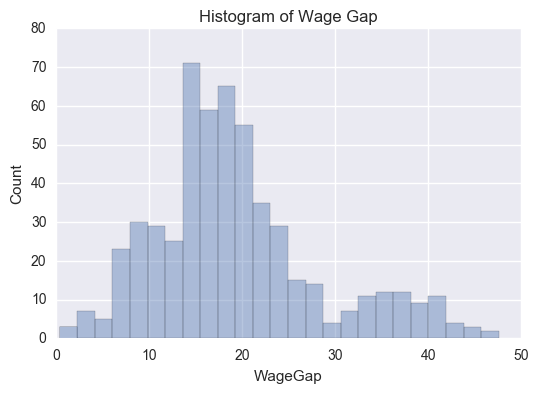

In [20]:
%matplotlib inline
sns.distplot(data_no_na.WageGaP, bins = 25, kde = False)
plt.title('Histogram of Wage Gap')
plt.xlabel('WageGap')
plt.ylabel('Count')

## 11 split to X and Y

In [21]:
x = data_no_na[list(data_no_na)[:-1]]

#split y to train and test by year
traintest_threshold = 2008
y_train = data_no_na[data_no_na['Year'] < traintest_threshold ]
y_train = y_train['WageGaP']

y_test = data_no_na[data_no_na['Year'] >= traintest_threshold ]
y_test = y_test['WageGaP']

## 12 Normelize all values in X

In [22]:
#normelized values in x will be in range(0,1)
l = list(data_no_na)
x_normelize = pd.DataFrame(sp.MinMaxScaler().fit_transform(data_no_na),columns = l)
#remove the prediction column from x
x_normelize.drop('WageGaP', axis=1, inplace=True)

## 13 split X to train and test data

In [23]:
#train will contain years 1975-2008
min_year = min(data_no_na['Year']); max_year=max(data_no_na['Year']);
normalized_threshold = ((traintest_threshold - min_year)/(max_year - min_year))
x_train = x_normelize[x_normelize['Year'] < normalized_threshold]
x_test = x_normelize[x_normelize['Year'] >= normalized_threshold]

## 14 Data Modeling

continue working with x_train, x_test, y_train, y_test

## 14.1 ML - linear regression using sklearn

Computing regularization path using the coordinate descent lasso...


C:\Users\shiran\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


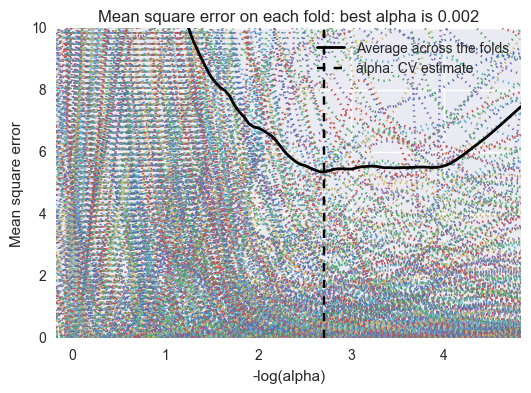

In [24]:
print("Computing regularization path using the coordinate descent lasso...")
n_fold_cv = x_train.shape[0]
model = linear_model.LassoCV(eps=1e-5,n_alphas=100, cv=n_fold_cv).fit(x_train,y_train)
# Display results
m_log_alphas = -np.log10(model.alphas_)

plt.figure()
ymin, ymax = 0, 10
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: best alpha is %.3f' %model.alpha_)
plt.axis('tight')
plt.ylim(ymin, ymax)
plt.show()

In [25]:
#coefficients remaining
model.coef_

array([ -5.08424559,   2.38547619,  -5.86292107,   6.93631745,
        -7.77093921,   1.32008159,   0.        ,   5.85547347,
         4.07541055,  -0.        ,   2.28622627,   0.        ,
       -15.83458582,  -0.        ,  23.18581472, -14.747097  ,
        -1.61809527,  -0.        ,  -3.32400401,  -6.95734948,
        -2.11755436,  -4.88895761,   0.89209426,   0.        ,
         0.        ,  -2.67715638,   0.15955442,   3.64653861,
         0.        ,   7.63954058,  19.87964645,  -3.02693696,
        -7.80812825,  -4.18689506,  -1.0856404 ,  -0.        ,
        -6.56312663,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.60726609,  -0.        ,  -0.        ,   4.13266583,
        -2.88281773, -14.17018296, -12.30659757,  11.93695608,
        -0.        ,   0.        ,   7.07847832,  -0.49310045,
         1.38186543,   1.39743448,   0.62673892, -11.39877068,
         0.        ,  -1.80153078,  -0.        ,   0.67

## 14.2 getting the model error

In [26]:
#get the error
y_hat_test = model.predict(x_test)
err = metrics.mean_squared_error(y_test,y_hat_test)
print ('test mse is : %.2f' %err)

test mse is : 15.75


## 14.3 printing the remaining features

In [27]:
#remaining features
sfm = feature_selection.SelectFromModel(model, prefit=True)
remaining_features = [list(x_train)[i] for i in sfm.get_support(True)]
print ('The renaming features after lasso selection:')
countries = [x for x in remaining_features if 'country' in x]
print (len(remaining_features))
print ('countries count {0}'.format(len(countries)))

The renaming features after lasso selection:
52
countries count 23


## 15 Visualization 2

## 15.1 wage gap graph vs year for each country

Total Countries 31
Countries in feature list 23


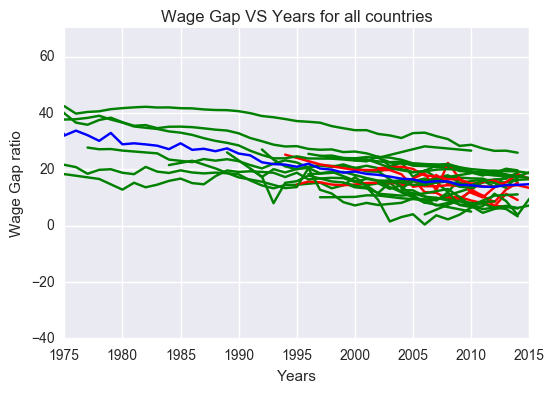

In [28]:
%matplotlib inline
#green - countries in features
#red- countries that are not in features
#blue- avverage on all countries
#creating x again in case x was changed during the last operatiotn
x = data_no_na[list(data_no_na)[:-1]]

#create x vector
plot_data = data_no_na
years = set(plot_data['Year'])
years=list(years)
country_colums_list = list(x)[0:countries_count]
y_graphs_dict = {}
#split to x axis (years) and y axis(wage gap)
for country in country_colums_list:
     y_vector = plot_data[plot_data[country] == 1]
     y_vector=pd.DataFrame(y_vector, columns = ['Year','WageGaP'])
     y_graphs_dict[country] = y_vector

#add average
aggregated = plot_data.groupby('Year').mean()['WageGaP']
aggregated_wg = aggregated.to_frame(name='WageGaP_Avg')
np_array_gap_average = aggregated_wg['WageGaP_Avg'].values
y_graphs_dict['WageGapAvg'] = np_array_gap_average.tolist()

plt.show()
plot_tuple = ()
feature_countries = [x for x in remaining_features if x.startswith('country')]
print ('Total Countries {0}'.format(len(country_colums_list)))
print ('Countries in feature list {0}'.format(len(feature_countries)))

#plotting the graphs with relevent colors
for country in country_colums_list:
    color = 'r'
    if country in remaining_features:
        color = 'g'
    plot_tuple =  plot_tuple+(y_graphs_dict[country].Year,y_graphs_dict[country].WageGaP,color)

#ploting average in blue color
plot_tuple =  plot_tuple+(years,y_graphs_dict['WageGapAvg'],'b')

for i in range(0,len(plot_tuple),3):
    plt.plot(plot_tuple[i],plot_tuple[i+1],plot_tuple[i+2])

plt.ylabel('Wage Gap ratio')
plt.xlabel('Years')
plt.title('Wage Gap VS Years for all countries')
plt.xlim(1975,2015)
plt.ylim(-40,70)
plt.show()

## 15.2 test_Prediction vs test_Data 

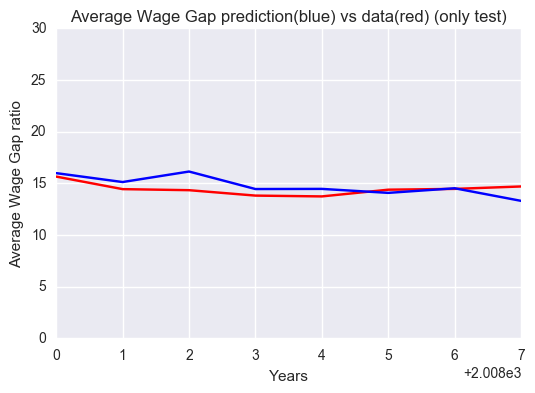

In [29]:
%matplotlib inline

test = data_no_na[data_no_na['Year'] >= traintest_threshold]

plot_data = test[['Year','WageGaP']]
plot_data = plot_data.groupby('Year').mean()

cols = test.columns.tolist()
test_2 = test.reset_index(drop=True)
test_2.columns = cols

df_y_hat = pd.DataFrame(data=y_hat_test,columns=['WageGaPPredict'])

df_prediction = pd.concat([test_2,df_y_hat], axis=1, join='inner')
plot_Prediction = df_prediction[['Year','WageGaPPredict']]
plot_Prediction = plot_Prediction.groupby('Year').mean()

lines = plt.plot(plot_data.index,plot_data.WageGaP,color='r')
lines = plt.plot(plot_Prediction.index,plot_Prediction.WageGaPPredict,color='b')

plt.ylabel('Average Wage Gap ratio')
plt.xlabel('Years')
plt.title('Average Wage Gap prediction(blue) vs data(red) (only test)')
plt.ylim(0,30)
plt.xlim(traintest_threshold,2015)
plt.show()

## 16 Run Model on train and test

In [30]:
y_hat = model.predict(x_normelize)

## 16.1 Visualize Prediction Vs Data (Train and Test)

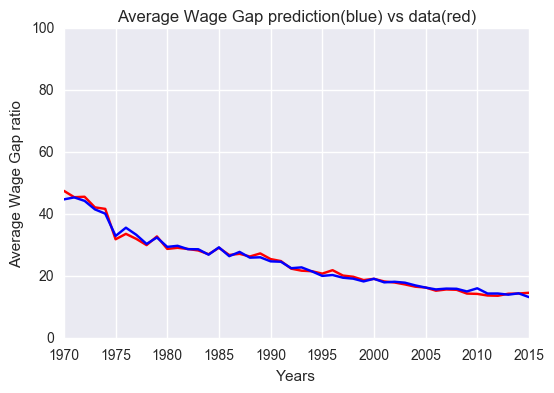

In [31]:
%matplotlib inline

plot_data = data_no_na[['Year','WageGaP']]
plot_data = plot_data.groupby('Year').mean()

# cols = x_normelize.columns.tolist()
# x_normelize_2 = x_normelize.reset_index(drop=True)
# x_normelize_2.columns = cols

df_y_hat = pd.DataFrame(data=y_hat,columns=['WageGaPPredict'])

df_prediction_and_data = pd.concat([data_no_na,df_y_hat], axis=1, join='inner')
plot_Prediction = df_prediction_and_data[['Year','WageGaPPredict']]
plot_Prediction = plot_Prediction.groupby('Year').mean()

lines = plt.plot(plot_data.index,plot_data.WageGaP,color='r')
lines = plt.plot(plot_Prediction.index,plot_Prediction.WageGaPPredict,color='b')

plt.ylabel('Average Wage Gap ratio')
plt.xlabel('Years')
plt.title('Average Wage Gap prediction(blue) vs data(red)')
plt.ylim(0,100)
plt.show()

## 16.2 Visualize Average Error Precentage

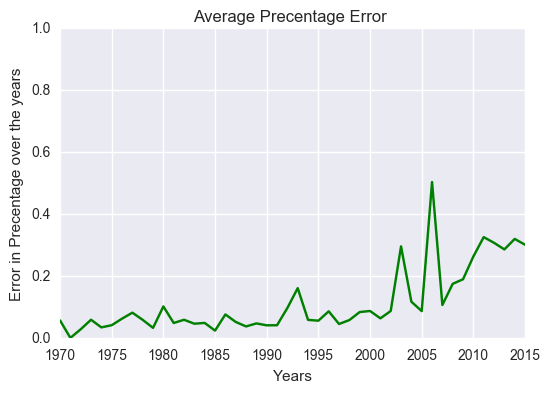

average error in precentage: 0.17


In [32]:
precentage_error_sklearn = (abs(df_prediction_and_data['WageGaPPredict']-df_prediction_and_data['WageGaP'])/df_prediction_and_data['WageGaP'])

df_precentage_error_sklearn = pd.DataFrame(data=precentage_error_sklearn,columns=['PrecentageErr'])

df_prediction_and_data_and_error_sklearn = pd.concat([data_no_na,df_y_hat,df_precentage_error_sklearn], axis=1, join='inner')

plot_precentageErr_sklearn = df_prediction_and_data_and_error_sklearn[['Year','PrecentageErr']]
plot_precentageErr_sklearn = plot_precentageErr_sklearn.groupby('Year').mean()

lines = plt.plot(plot_precentageErr_sklearn.index,plot_precentageErr_sklearn.PrecentageErr,color='g')

plt.ylabel('Error in Precentage over the years')
plt.xlabel('Years')
plt.title('Average Precentage Error ')
plt.ylim(0,1)
plt.show()

err = precentage_error_sklearn.mean()

print('average error in precentage: %.2f' %err)

# 17 Data Modeling (II)

## 17.1 ML - linear regression using statsmodels

In [33]:
x_train_stats = x_train[remaining_features]

stats_model = sm.OLS(y_train,x_train_stats)
stats_model_results = stats_model.fit()
print(stats_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                WageGaP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1159.
Date:                Wed, 11 Jan 2017   Prob (F-statistic):               0.00
Time:                        19:06:54   Log-Likelihood:                -715.43
No. Observations:                 367   AIC:                             1535.
Df Residuals:                     315   BIC:                             1738.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                                                                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------

## 17.2 calculation statsmodel mse

In [34]:
x_train_stats = x_test[remaining_features]
y_hat_test_stats = stats_model_results.predict(x_train_stats)
err = metrics.mean_squared_error(y_test,y_hat_test_stats)
print ('statsmodel test mse is : %.2f' %err)

statsmodel test mse is : 18.71


# 18 Visualization statsmodel results

## 18.1 test_Prediction vs test_Data (statsmodel)

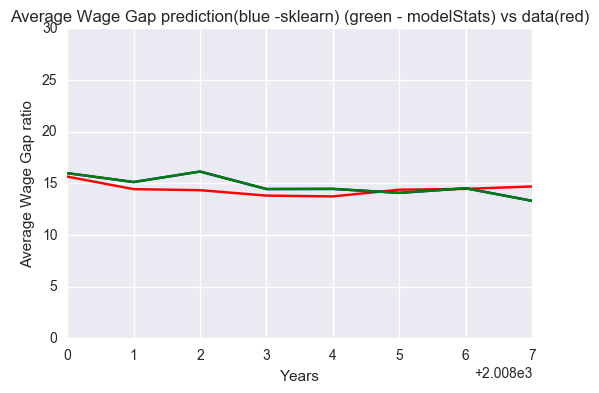

In [35]:
%matplotlib inline

test = data_no_na[data_no_na['Year'] >= traintest_threshold]

plot_data = test[['Year','WageGaP']]
plot_data = plot_data.groupby('Year').mean()

cols = test.columns.tolist()
test_2 = test.reset_index(drop=True)
test_2.columns = cols

df_y_hat_stats = pd.DataFrame(data=y_hat_test_stats,columns=['WageGaPPredict'])

df_prediction_stats = pd.concat([test_2,df_y_hat_stats], axis=1, join='inner')
plot_Prediction_stats = df_prediction_stats[['Year','WageGaPPredict']]
plot_Prediction_stats = plot_Prediction_stats.groupby('Year').mean()

lines = plt.plot(plot_data.index,plot_data.WageGaP,color='r')
lines = plt.plot(plot_Prediction.index,plot_Prediction.WageGaPPredict,color='b')
lines = plt.plot(plot_Prediction_sklearn.index,plot_Prediction_sklearn.WageGaPPredict,color='g')

plt.ylabel('Average Wage Gap ratio')
plt.xlabel('Years')
plt.title('Average Wage Gap prediction (green - modelStats) vs data(red)')
plt.ylim(0,30)
plt.xlim(traintest_threshold,2015)
plt.show()

# 19 Run statsmodels Model on train and test

In [36]:
y_hat_stats = stats_model_results.predict(x_normelize[remaining_features])

## 19.1 Visualize Prediction Vs Data Train and Test (statsmodels)

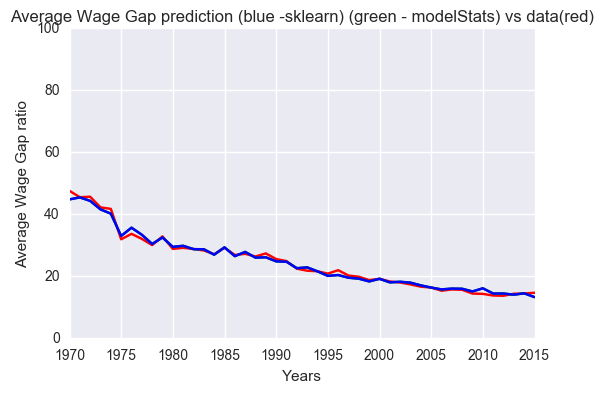

In [57]:
%matplotlib inline

plot_data = data_no_na[['Year','WageGaP']]
plot_data = plot_data.groupby('Year').mean()

df_y_hat_stats = pd.DataFrame(data=y_hat_stats,columns=['WageGaPPredict'])

df_prediction_stats = pd.concat([data_no_na,df_y_hat_stats], axis=1, join='inner')
plot_Prediction_stats = df_prediction_stats[['Year','WageGaPPredict']]
plot_Prediction_stats = plot_Prediction_stats.groupby('Year').mean()

df_y_hat_sklearn = pd.DataFrame(data=y_hat,columns=['WageGaPPredict'])

df_prediction_sklearn = pd.concat([data_no_na,df_y_hat_sklearn], axis=1, join='inner')
plot_Prediction_sklearn = df_prediction_sklearn[['Year','WageGaPPredict']]
plot_Prediction_sklearn = plot_Prediction_sklearn.groupby('Year').mean()

lines = plt.plot(plot_data.index,plot_data.WageGaP,color='r')
lines = plt.plot(plot_Prediction.index,plot_Prediction.WageGaPPredict,color='b')
lines = plt.plot(plot_Prediction_sklearn.index,plot_Prediction_sklearn.WageGaPPredict,color='g')

plt.ylabel('Average Wage Gap ratio')
plt.xlabel('Years')
plt.title('Average Wage Gap prediction (blue -sklearn) (green - modelStats) vs data(red)')
plt.ylim(0,100)
plt.show()

## 19.2 Average Error Precentage (statsmodels)

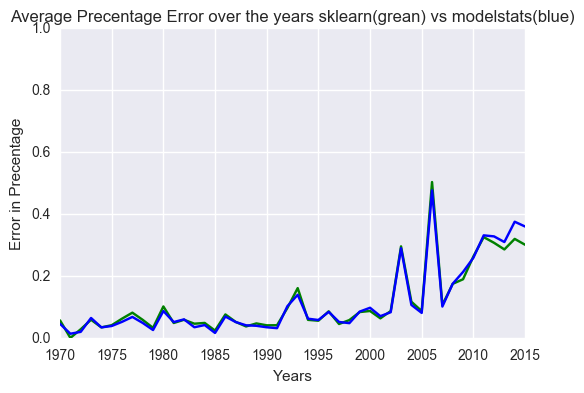

average error using sklearn in precentage: 0.17
average error using modelstatsin precentage: 0.17


In [38]:
precentage_error_stats=(abs(df_prediction_stats['WageGaPPredict']-df_prediction_stats['WageGaP'])/df_prediction_stats['WageGaP'])
precentage_error_sklearn = (abs(df_prediction_sklearn['WageGaPPredict']-df_prediction_sklearn['WageGaP'])/df_prediction_sklearn['WageGaP'])

df_precentage_error_stats = pd.DataFrame(data=precentage_error_stats,columns=['PrecentageErr'])
df_precentage_error_sklearn = pd.DataFrame(data=precentage_error_sklearn,columns=['PrecentageErr'])

df_prediction_and_data_and_error_sklearn = pd.concat([data_no_na,df_y_hat_sklearn,df_precentage_error_sklearn], axis=1, join='inner')
df_prediction_and_data_and_error_stats = pd.concat([data_no_na,df_y_hat_stats,df_precentage_error_stats], axis=1, join='inner')

plot_precentageErr_sklearn = df_prediction_and_data_and_error_sklearn[['Year','PrecentageErr']]
plot_precentageErr_sklearn = plot_precentageErr_sklearn.groupby('Year').mean()

plot_precentageErr_stats = df_prediction_and_data_and_error_stats[['Year','PrecentageErr']]
plot_precentageErr_stats = plot_precentageErr_stats.groupby('Year').mean()


lines = plt.plot(plot_precentageErr_sklearn.index,plot_precentageErr_sklearn.PrecentageErr,color='g')
lines = plt.plot(plot_precentageErr_stats.index,plot_precentageErr_stats.PrecentageErr,color='b')

plt.ylabel('Error in Precentage')
plt.xlabel('Years')
plt.title('Average Precentage Error over the years sklearn(grean) vs modelstats(blue)')
plt.ylim(0,1)
plt.show()

err_mean_stats = precentage_error_stats.mean()
err_mean_sklearn = precentage_error_sklearn.mean()

print('average error using sklearn in precentage: %.2f' %err_mean_stats)
print('average error using modelstatsin precentage: %.2f' %err_mean_sklearn)

# 20 selected features correlations

C:\Users\shiran\Anaconda2\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


Selecting correlation groups manually


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001058EB70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001F3405F8>]], dtype=object)

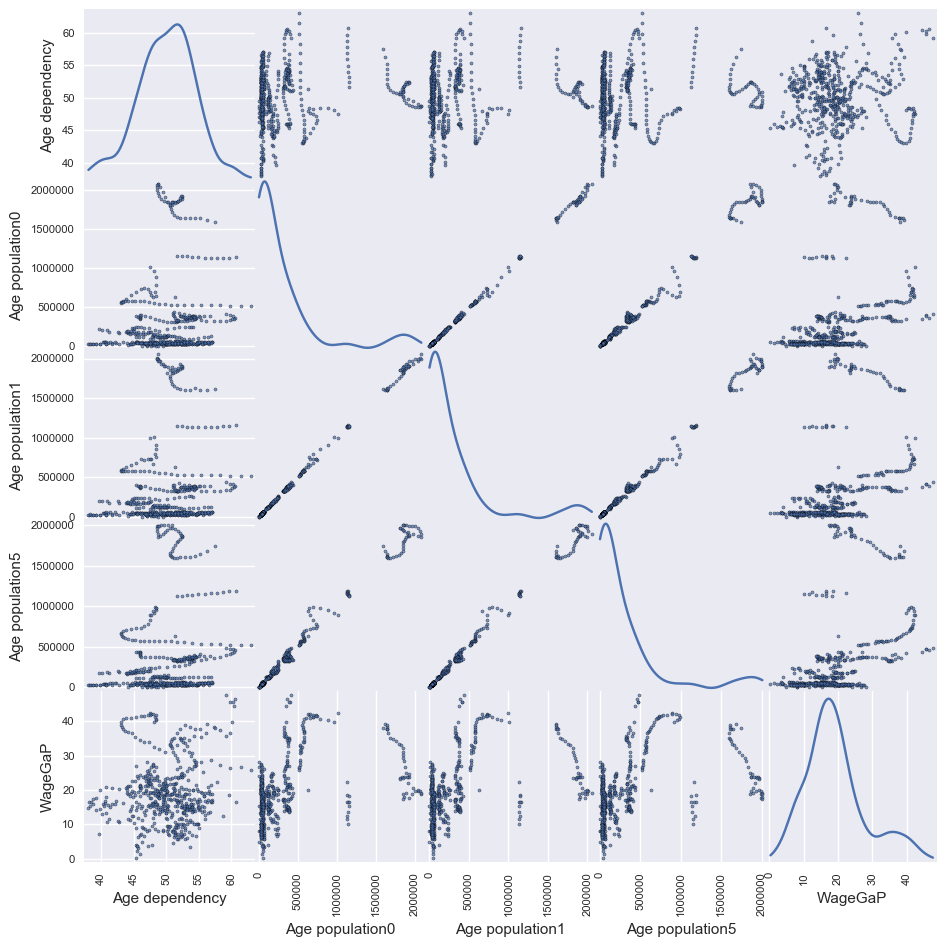

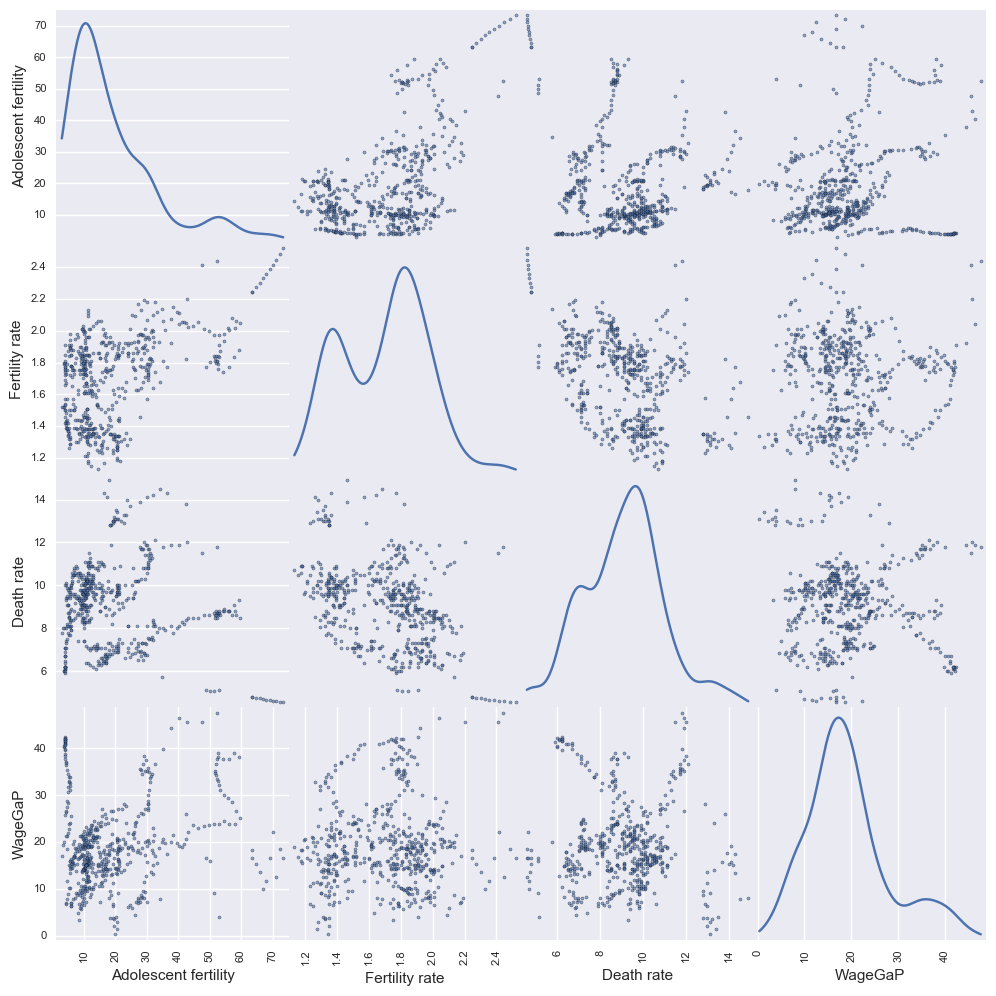

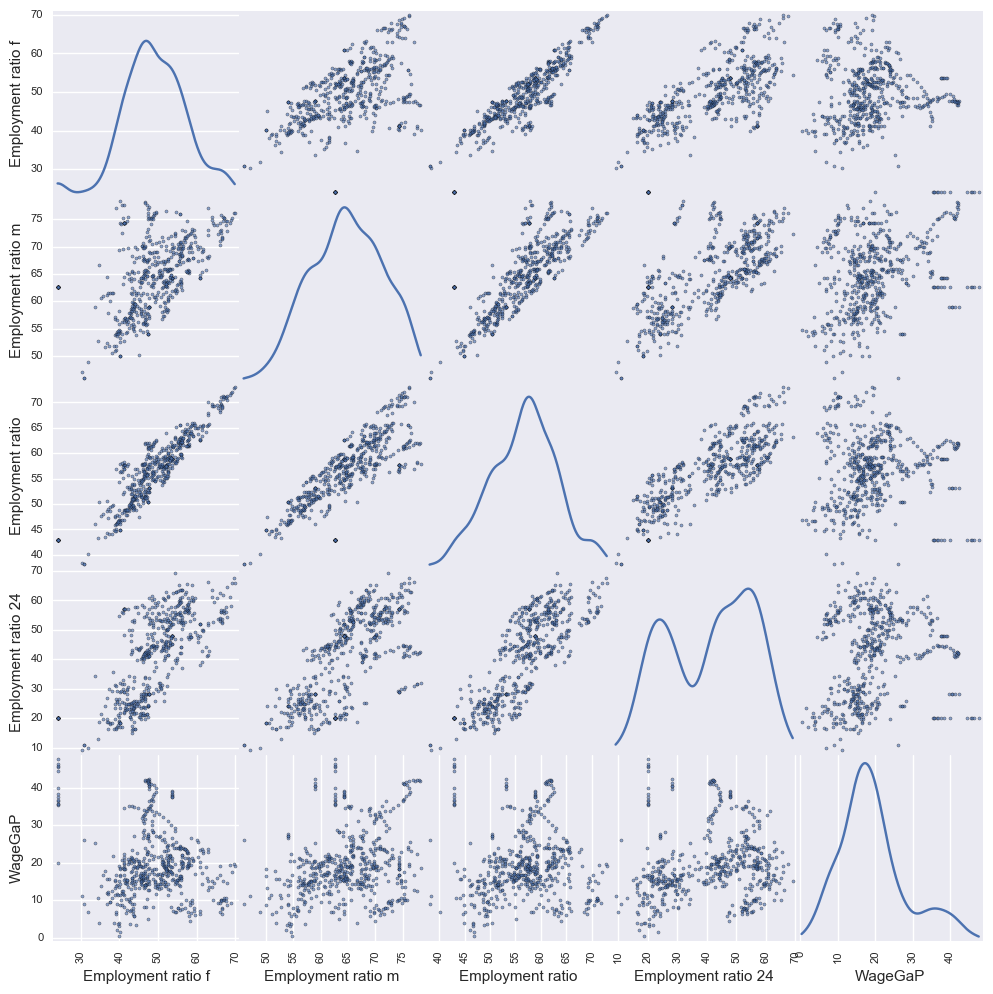

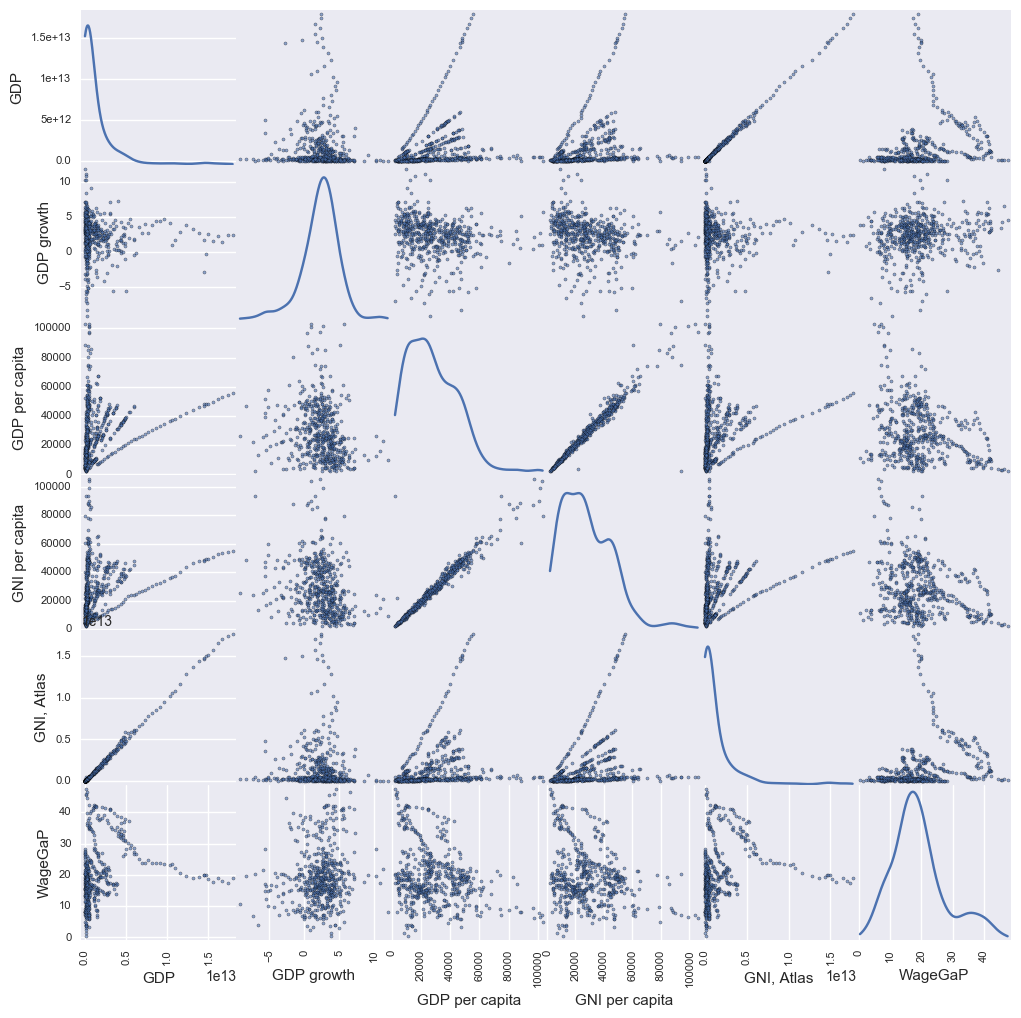

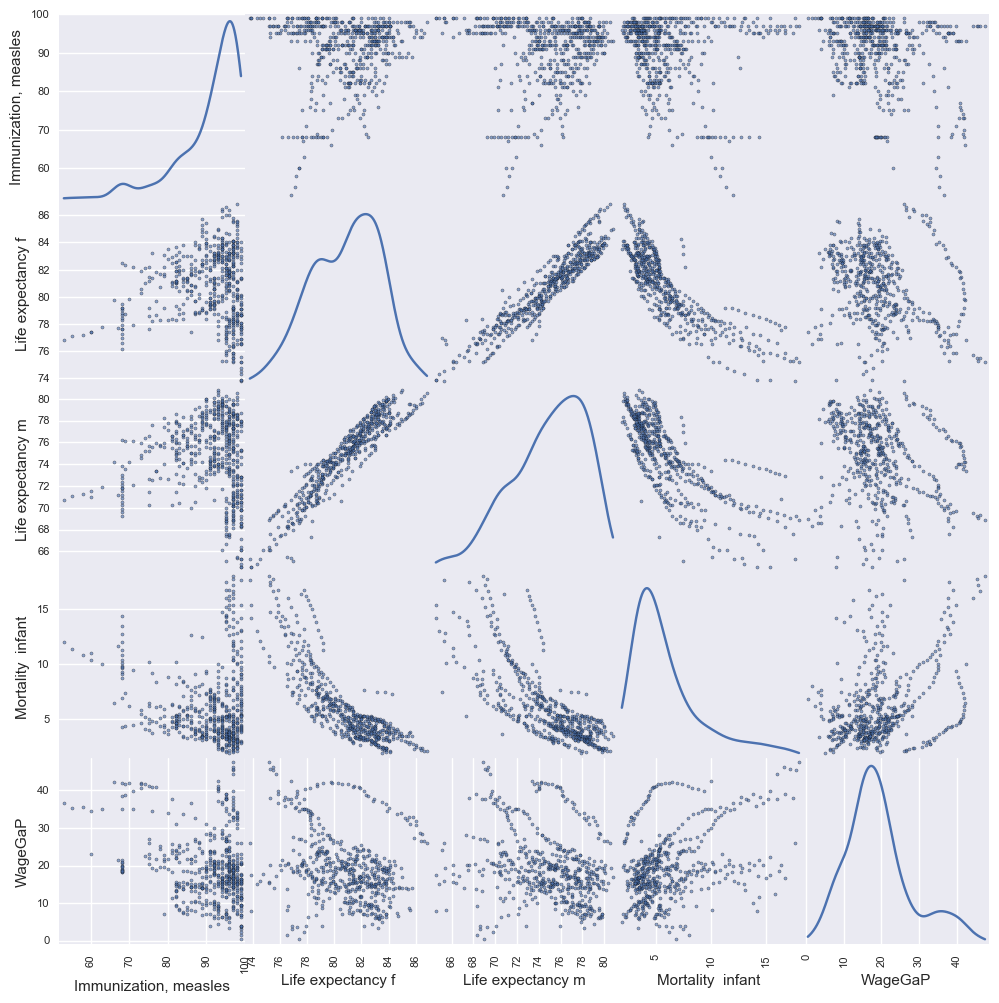

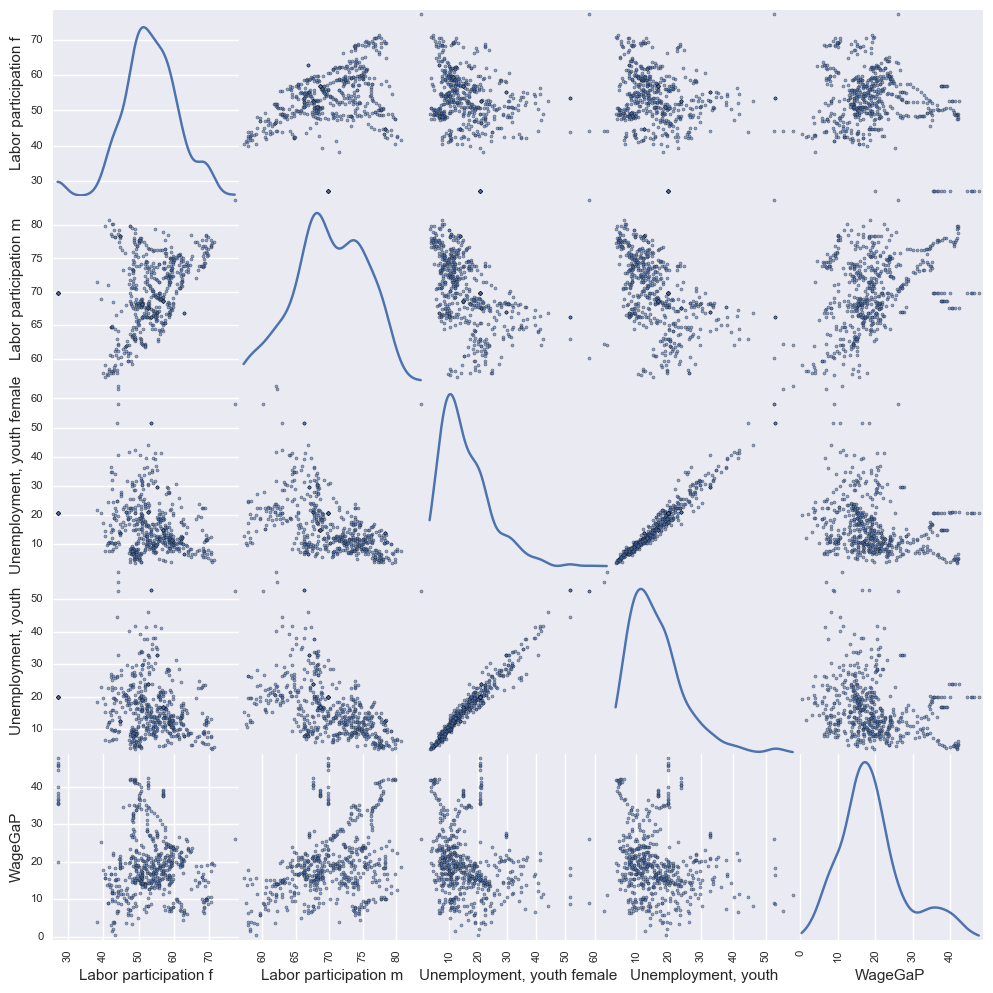

In [39]:
from pandas.tools.plotting import scatter_matrix

#help df for renaming the indicator code with meaningfull names
temp_data_row= pd.read_csv('name_to_code.csv',header = None,skiprows=1)
temp_data_row.columns = ['index','Indicator Name', 'Indicator Code', 'meaning']

correlation_cols = [x for x in remaining_features if 'country' not in x]+['WageGaP']
features_df = data_no_na[correlation_cols]

#replace the columns names with codes
#create dict old-new
names_dict ={}
for index,row in temp_data_row.iterrows():
    names_dict[row['Indicator Name']] = row['meaning']
    
features_df.rename(columns=names_dict, inplace=True)
#output correlations per groups
print ('Selecting correlation groups manually')
group1 = ['Age dependency','Age population0','Age population1','Age population5','WageGaP']

group2 = ['Adolescent fertility','Fertility rate','Death rate','WageGaP']
group3 = ['Employment ratio f','Employment ratio m','Employment ratio','Employment ratio 24','WageGaP']
group4 = ['GDP','GDP growth','GDP per capita','GNI per capita','GNI, Atlas','WageGaP']
group5 = ['Immunization, measles','Life expectancy f','Life expectancy m','Mortality  infant ','WageGaP']
group6 = ['Labor participation f','Labor participation m','Unemployment, youth female','Unemployment, youth','WageGaP']

#print scatter matrix
corr_df1 = features_df[group1]
scatter_matrix(corr_df1, alpha=0.7, figsize=(11, 11), diagonal='kde')

corr_df2 = features_df[group2]
scatter_matrix(corr_df2, alpha=0.6, figsize=(12, 12), diagonal='kde')

corr_df3 = features_df[group3]
scatter_matrix(corr_df3, alpha=0.6, figsize=(12, 12), diagonal='kde')

corr_df4 = features_df[group4]
scatter_matrix(corr_df4, alpha=0.6, figsize=(12, 12), diagonal='kde')

corr_df5 = features_df[group5]
scatter_matrix(corr_df5, alpha=0.6, figsize=(12, 12), diagonal='kde')


corr_df6 = features_df[group6]
scatter_matrix(corr_df6, alpha=0.6, figsize=(12, 12), diagonal='kde')

# 21 Searching for a tuple of feature with a product that has a linear correlation to WageGap 

In [40]:
reaminig_features_without_countries = [x for x in remaining_features if not x.startswith("country-full-name")]
x_remaining_features = x_test[reaminig_features_without_countries]
df_y = pd.DataFrame(data_no_na[['WageGaP']],columns=['WageGaP'])
normalized_data_xy = pd.concat([x_remaining_features,df_y], axis=1, join='inner')

df_pearson = pd.DataFrame(columns=['feature_tuple','pearson'])
pearson_index = 0

for i in range(len(reaminig_features_without_countries)):
    for j in range(i+1,len(reaminig_features_without_countries)):
        feat_1 = reaminig_features_without_countries[i]
        feat_2 = reaminig_features_without_countries[j]
        column_name = "{0} * {1}".format(feat_1,feat_2)
        normalized_data_xy[column_name] = normalized_data_xy[feat_1] * normalized_data_xy[feat_2]
        pearson = normalized_data_xy[[column_name,'WageGaP']].corr()
        df_pearson.loc[pearson_index]=[abs(pearson.iloc[0]['WageGaP']),column_name]
        pearson_index = pearson_index +1 

df_pearson.sort_values(['feature_tuple']).head()

,feature_tuple,pearson
66,0.000187,Age dependency ratio (% of working-age populat...
21,0.000343,"Year * Mortality rate, infant (per 1,000 live ..."
340,0.001519,"Immunization, measles (% of children ages 12-2..."
198,0.002036,"Employment to population ratio, 15+, male (%) ..."
371,0.002321,"Life expectancy at birth, female (years) * Mor..."


# 22 reduce features by correltations

In [42]:
original_feature_count = len(list(features_df))
reduced_features_df = features_df[:]
#1.merge age population cols
age_population_cols =['Age population0','Age population1','Age population5']
age_pop_df = features_df[age_population_cols]
age_pop_df['Age population 0-5'] = age_pop_df.mean(axis=1)

#drop the age population columns
reduced_features_df.drop('Age population0', axis=1, inplace=True)
reduced_features_df.drop('Age population1', axis=1, inplace=True)
reduced_features_df.drop('Age population5', axis=1, inplace=True)
reduced_features_df= pd.concat((reduced_features_df, age_pop_df['Age population 0-5']),axis=1)

#2.remove gdp coulmns
reduced_features_df.drop('GDP per capita', axis=1, inplace=True)
reduced_features_df.drop('GNI per capita', axis=1, inplace=True)

#3. 4.Life expectancy- merge male and female
life_e_cols = ['Life expectancy f','Life expectancy m']
life_e_df = features_df[life_e_cols]
life_e_df['Life expectancy f+m'] = life_e_df.mean(axis=1)
reduced_features_df.drop('Life expectancy f', axis=1, inplace=True)
reduced_features_df.drop('Life expectancy m', axis=1, inplace=True)
reduced_features_df= pd.concat((reduced_features_df, life_e_df['Life expectancy f+m']),axis=1)
#remove - Unemployment, youth female, low t-test and linear correlation to total value
reduced_features_df.drop('Unemployment, youth female', axis=1, inplace=True)

#reorder columns
cols = list(reduced_features_df)
final_df = pd.concat((reduced_features_df[cols[:-3]],reduced_features_df[cols[-2]],reduced_features_df[cols[-1]],reduced_features_df[cols[-3]]),axis=1)

print('Reduced features amount from {0} to {1}'.format(original_feature_count,len(list(final_df))))


C:\Users\shiran\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\shiran\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\shiran\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\shiran\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning:

Reduced features amount from 30 to 24


# 23 remove low  t-test features

In [43]:
final_df.drop('GDP', axis=1, inplace=True)
countries_cols = [x for x in remaining_features if 'country' in x]
contry_df = data_no_na[countries_cols]
contry_df.drop('country-full-name_Spain', axis=1, inplace=True)
full_df = pd.concat((contry_df,final_df),axis=1)
full_df.head()

C:\Users\shiran\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,country-full-name_Australia,country-full-name_Austria,country-full-name_Belgium,country-full-name_Canada,country-full-name_Chile,country-full-name_Czech Republic,country-full-name_Estonia,country-full-name_Finland,country-full-name_Germany,country-full-name_Hungary,...,Labor participation m,Mortality infant,Population f,School enrollment,School enrollment f,"Unemployment, youth",Wage salaried workers f,Age population 0-5,Life expectancy f+m,WageGaP
0,1,0,0,0,0,0,0,0,0,0,...,78.300003,14.4,49.851432,0.99476,107.268402,12.5,87.099998,125622.000000,72.71,21.582733
1,1,0,0,0,0,0,0,0,0,0,...,78.300003,13.5,49.897011,0.99183,107.989410,12.5,87.099998,124702.000000,73.10,20.754717
2,1,0,0,0,0,0,0,0,0,0,...,78.300003,12.7,49.948314,0.99184,109.968758,12.5,87.099998,118779.333333,73.43,18.390804
3,1,0,0,0,0,0,0,0,0,0,...,78.300003,12.0,49.999210,0.99105,110.979317,12.5,87.099998,114415.666667,73.76,19.791666
4,1,0,0,0,0,0,0,0,0,0,...,78.300003,11.3,50.041641,0.99036,110.500870,12.5,87.099998,110822.666667,74.09,20.000000


# 24 creating new x and y

In [44]:
#split to X and y
x = full_df[list(full_df)[:-1]]

traintest_threshold = 2008
y_train = full_df[full_df['Year'] < traintest_threshold ]
y_train = y_train['WageGaP']

y_test = full_df[full_df['Year'] >= traintest_threshold ]
y_test = y_test['WageGaP']

#Normelize all values in x
l = list(full_df)
x_normelize = pd.DataFrame(sp.MinMaxScaler().fit_transform(full_df),columns = l)
x_normelize.drop('WageGaP', axis=1, inplace=True)

#split to train and test data
min_year = min(full_df['Year']); max_year=max(full_df['Year']);
normalized_threshold = ((traintest_threshold - min_year)/(max_year - min_year))
x_train = x_normelize[x_normelize['Year'] < normalized_threshold]
x_test = x_normelize[x_normelize['Year'] >= normalized_threshold]

# 25 Searching for a tuple of feature with a product that has a linear correlation to WageGap - on new reduced df

In [45]:
remaining_features_new = list(full_df)
remaining_features_new=remaining_features_new[:-1]
reaminig_features_without_countries = [x for x in remaining_features_new if not x.startswith("country-full-name")]
x_remaining_features = x_test[reaminig_features_without_countries]
df_y = pd.DataFrame(full_df[['WageGaP']],columns=['WageGaP'])
normalized_data_xy = pd.concat([x_remaining_features,df_y], axis=1, join='inner')

df_pearson = pd.DataFrame(columns=['feature_tuple','pearson'])
pearson_index = 0

for i in range(len(reaminig_features_without_countries)):
    for j in range(i+1,len(reaminig_features_without_countries)):
        feat_1 = reaminig_features_without_countries[i]
        feat_2 = reaminig_features_without_countries[j]
        column_name = "{0} * {1}".format(feat_1,feat_2)
        normalized_data_xy[column_name] = normalized_data_xy[feat_1] * normalized_data_xy[feat_2]
        pearson = normalized_data_xy[[column_name,'WageGaP']].corr()
        df_pearson.loc[pearson_index]=[abs(pearson.iloc[0]['WageGaP']),column_name]
        pearson_index = pearson_index +1
        
df_pearson.sort_values(['feature_tuple']).head()

,feature_tuple,pearson
13,0.000343,Year * Mortality infant
176,0.001519,"Immunization, measles * Labor participation f"
97,0.002036,Employment ratio m * Fertility rate
35,0.002757,Adolescent fertility * School enrollment
40,0.002825,Adolescent fertility * Life expectancy f+m


# 26 New Data Modeling - after changes

## 26.1 ML - linear regression using statsmodels

In [47]:
x_train_stats = x_train[remaining_features_new]

stats_model = sm.OLS(y_train,x_train_stats)
stats_model_results = stats_model.fit()
#printing model output including t-test results
print(stats_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                WageGaP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1395.
Date:                Wed, 11 Jan 2017   Prob (F-statistic):               0.00
Time:                        19:10:06   Log-Likelihood:                -716.59
No. Observations:                 367   AIC:                             1521.
Df Residuals:                     323   BIC:                             1693.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------
country-

## 26.2 mse calculation

In [48]:
x_train_stats = x_test[remaining_features_new]
y_hat_test_stats = stats_model_results.predict(x_train_stats)
err = metrics.mean_squared_error(y_test,y_hat_test_stats)
#run stat models and predict
y_hat_stats = stats_model_results.predict(x_normelize[remaining_features_new])
print ('statsmodel test mse is : %.2f' %err)

statsmodel test mse is : 18.62


## 26.3 Avg error precetage

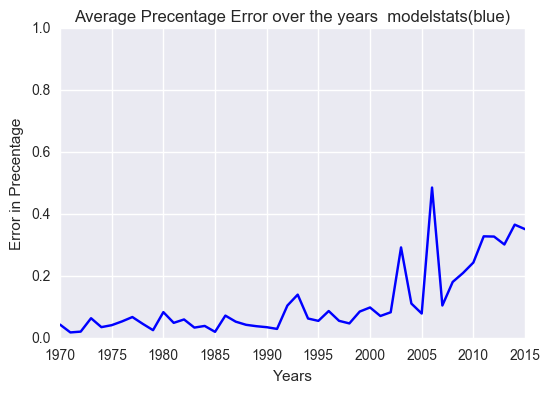

average error using modelstatsin precentage: 0.17


In [49]:
df_y_hat_stats = pd.DataFrame(data=y_hat_stats,columns=['WageGaPPredict'])
df_prediction_stats = pd.concat([full_df,df_y_hat_stats], axis=1, join='inner')

precentage_error_stats=(abs(df_prediction_stats['WageGaPPredict']-df_prediction_stats['WageGaP'])/df_prediction_stats['WageGaP'])

df_precentage_error_stats = pd.DataFrame(data=precentage_error_stats,columns=['PrecentageErr'])

df_prediction_and_data_and_error_stats = pd.concat([data_no_na,df_y_hat_stats,df_precentage_error_stats], axis=1, join='inner')

plot_precentageErr_stats = df_prediction_and_data_and_error_stats[['Year','PrecentageErr']]
plot_precentageErr_stats = plot_precentageErr_stats.groupby('Year').mean()

lines = plt.plot(plot_precentageErr_stats.index,plot_precentageErr_stats.PrecentageErr,color='b')

plt.ylabel('Error in Precentage')
plt.xlabel('Years')
plt.title('Average Precentage Error over the years  modelstats(blue)')
plt.ylim(0,1)
plt.show()

err_mean_stats = precentage_error_stats.mean()
print('average error using modelstatsin precentage: %.2f' %err_mean_sklearn)

# 27 - Visualization for new model

## 27.1 test_Prediction vs test_Data (statsmodel)

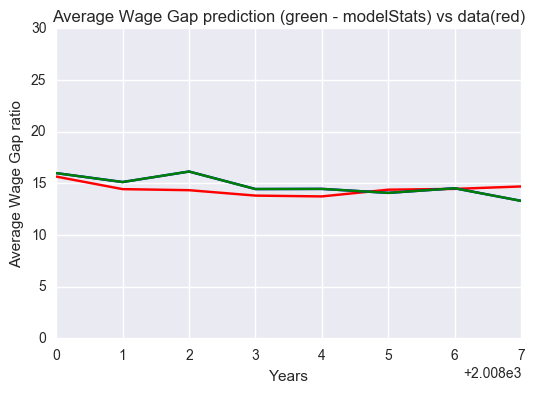

In [51]:
%matplotlib inline

test = data_no_na[data_no_na['Year'] >= traintest_threshold]

plot_data = test[['Year','WageGaP']]
plot_data = plot_data.groupby('Year').mean()

cols = test.columns.tolist()
test_2 = test.reset_index(drop=True)
test_2.columns = cols

df_y_hat_stats = pd.DataFrame(data=y_hat_test_stats,columns=['WageGaPPredict'])

df_prediction_stats = pd.concat([test_2,df_y_hat_stats], axis=1, join='inner')
plot_Prediction_stats = df_prediction_stats[['Year','WageGaPPredict']]
plot_Prediction_stats = plot_Prediction_stats.groupby('Year').mean()

lines = plt.plot(plot_data.index,plot_data.WageGaP,color='r')
lines = plt.plot(plot_Prediction.index,plot_Prediction.WageGaPPredict,color='b')
lines = plt.plot(plot_Prediction_sklearn.index,plot_Prediction_sklearn.WageGaPPredict,color='g')

plt.ylabel('Average Wage Gap ratio')
plt.xlabel('Years')
plt.title('Average Wage Gap prediction (green - modelStats) vs data(red)')
plt.ylim(0,30)
plt.xlim(traintest_threshold,2015)
plt.show()

## 27.2 Run statsmodels Model on train and test

In [53]:
y_hat_stats = stats_model_results.predict(x_normelize[remaining_features_new])

## 27.3 Visualize Prediction Vs Data Train and Test (statsmodels)

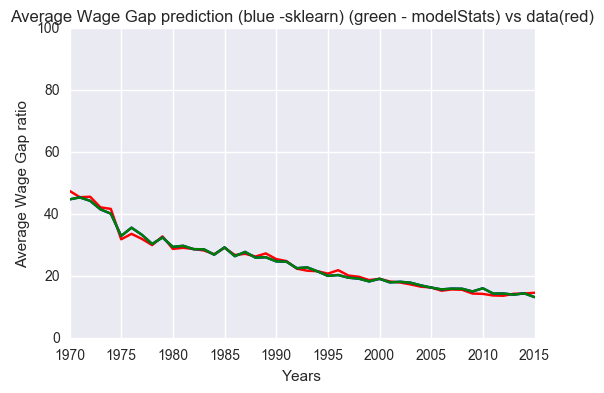

In [58]:
%matplotlib inline

plot_data = data_no_na[['Year','WageGaP']]
plot_data = plot_data.groupby('Year').mean()

df_y_hat_stats = pd.DataFrame(data=y_hat_stats,columns=['WageGaPPredict'])

df_prediction_stats = pd.concat([data_no_na,df_y_hat_stats], axis=1, join='inner')
plot_Prediction_stats = df_prediction_stats[['Year','WageGaPPredict']]
plot_Prediction_stats = plot_Prediction_stats.groupby('Year').mean()

df_y_hat_sklearn = pd.DataFrame(data=y_hat,columns=['WageGaPPredict'])

df_prediction_sklearn = pd.concat([data_no_na,df_y_hat_sklearn], axis=1, join='inner')
plot_Prediction_sklearn = df_prediction_sklearn[['Year','WageGaPPredict']]
plot_Prediction_sklearn = plot_Prediction_sklearn.groupby('Year').mean()

lines = plt.plot(plot_data.index,plot_data.WageGaP,color='r')
lines = plt.plot(plot_Prediction.index,plot_Prediction.WageGaPPredict,color='b')
lines = plt.plot(plot_Prediction_sklearn.index,plot_Prediction_sklearn.WageGaPPredict,color='g')

plt.ylabel('Average Wage Gap ratio')
plt.xlabel('Years')
plt.title('Average Wage Gap prediction (blue -sklearn) (green - modelStats) vs data(red)')
plt.ylim(0,100)
plt.show()

## 27.4 Average Error Precentage (statsmodels)

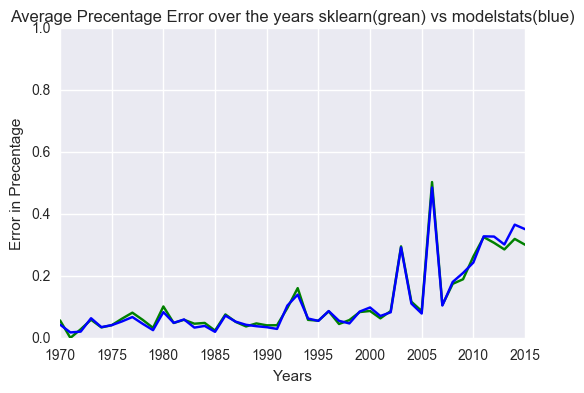

average error using sklearn in precentage: 0.17
average error using modelstatsin precentage: 0.17


In [59]:
precentage_error_stats=(abs(df_prediction_stats['WageGaPPredict']-df_prediction_stats['WageGaP'])/df_prediction_stats['WageGaP'])
precentage_error_sklearn = (abs(df_prediction_sklearn['WageGaPPredict']-df_prediction_sklearn['WageGaP'])/df_prediction_sklearn['WageGaP'])

df_precentage_error_stats = pd.DataFrame(data=precentage_error_stats,columns=['PrecentageErr'])
df_precentage_error_sklearn = pd.DataFrame(data=precentage_error_sklearn,columns=['PrecentageErr'])

df_prediction_and_data_and_error_sklearn = pd.concat([data_no_na,df_y_hat_sklearn,df_precentage_error_sklearn], axis=1, join='inner')
df_prediction_and_data_and_error_stats = pd.concat([data_no_na,df_y_hat_stats,df_precentage_error_stats], axis=1, join='inner')

plot_precentageErr_sklearn = df_prediction_and_data_and_error_sklearn[['Year','PrecentageErr']]
plot_precentageErr_sklearn = plot_precentageErr_sklearn.groupby('Year').mean()

plot_precentageErr_stats = df_prediction_and_data_and_error_stats[['Year','PrecentageErr']]
plot_precentageErr_stats = plot_precentageErr_stats.groupby('Year').mean()


lines = plt.plot(plot_precentageErr_sklearn.index,plot_precentageErr_sklearn.PrecentageErr,color='g')
lines = plt.plot(plot_precentageErr_stats.index,plot_precentageErr_stats.PrecentageErr,color='b')

plt.ylabel('Error in Precentage')
plt.xlabel('Years')
plt.title('Average Precentage Error over the years sklearn(grean) vs modelstats(blue)')
plt.ylim(0,1)
plt.show()

err_mean_stats = precentage_error_stats.mean()
err_mean_sklearn = precentage_error_sklearn.mean()

print('average error using sklearn in precentage: %.2f' %err_mean_stats)
print('average error using modelstatsin precentage: %.2f' %err_mean_sklearn)

# 28 Future Prediction

In [60]:
#Eylon